In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

In [2]:
df=pd.read_csv("E:/DEPI/Churn_Modelling.csv")
print(df.shape)

(10000, 14)


In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
print(df.duplicated().sum())

0


In [6]:
print(df.isnull().sum())


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [7]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
categorical_cols

Index(['Surname', 'Geography', 'Gender'], dtype='object')

In [8]:
for col in categorical_cols:
    print(df[col].unique())

['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
['France' 'Spain' 'Germany']
['Female' 'Male']


In [9]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df['Geography'] = df['Geography'].map({'France': 0, 'Spain': 1,'Germany':2})


In [10]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)


In [11]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,608,1,1,41,1,83807.86,1,0,1,112542.58,0
2,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,850,1,1,43,2,125510.82,1,1,1,79084.10,0


In [12]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
numeric_cols

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

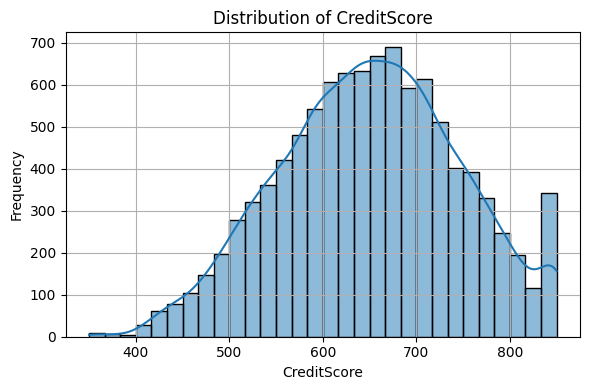

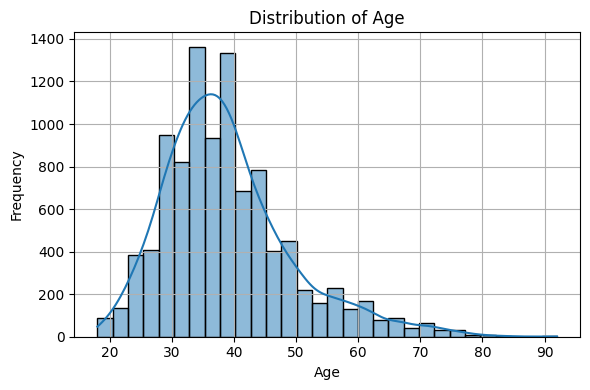

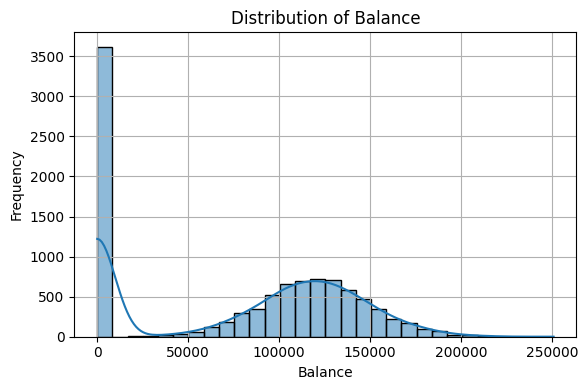

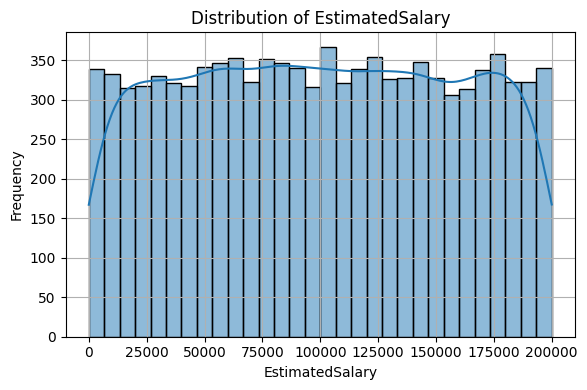

In [13]:
continuous_cols = [col for col in numeric_cols if df[col].nunique() >= 20]
for col in continuous_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


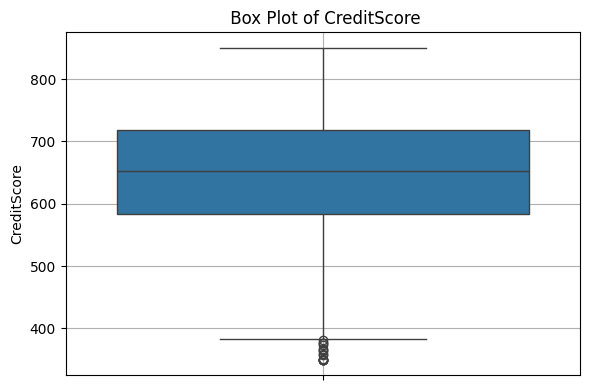

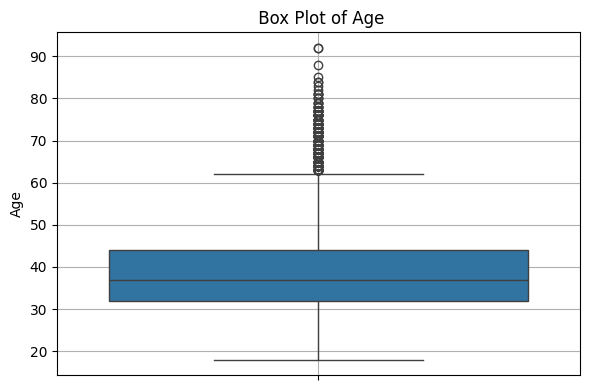

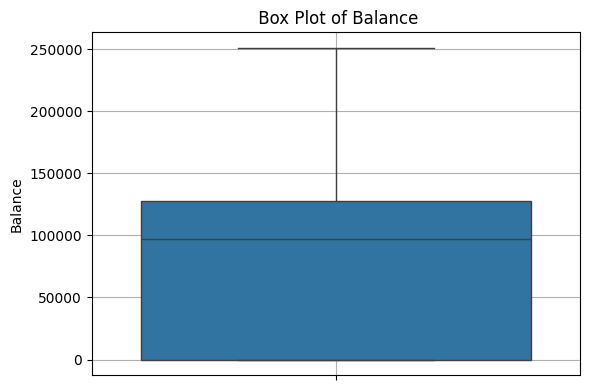

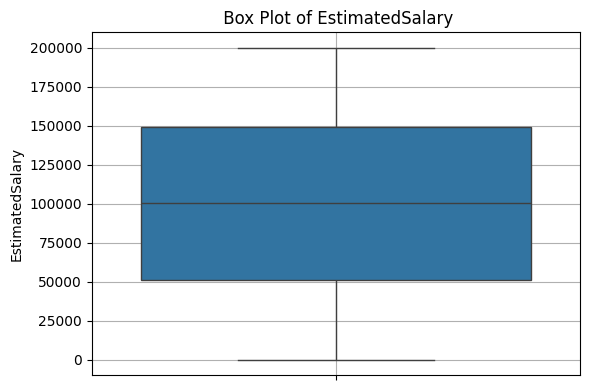

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in continuous_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[col])
    plt.title(f' Box Plot of {col}')
    plt.ylabel(col)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [15]:
columns_to_scale = ['Age', 'CreditScore']
scaler = RobustScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
print(df[columns_to_scale].head())


        Age  CreditScore
0  0.416667    -0.246269
1  0.333333    -0.328358
2  0.416667    -1.119403
3  0.166667     0.350746
4  0.500000     1.477612


In [16]:
corr_matrix = df[continuous_cols].corr()
print("📊 Correlation Matrix:")
print(corr_matrix)

📊 Correlation Matrix:
                 CreditScore       Age   Balance  EstimatedSalary
CreditScore         1.000000 -0.003965  0.006268        -0.001384
Age                -0.003965  1.000000  0.028308        -0.007201
Balance             0.006268  0.028308  1.000000         0.012797
EstimatedSalary    -0.001384 -0.007201  0.012797         1.000000


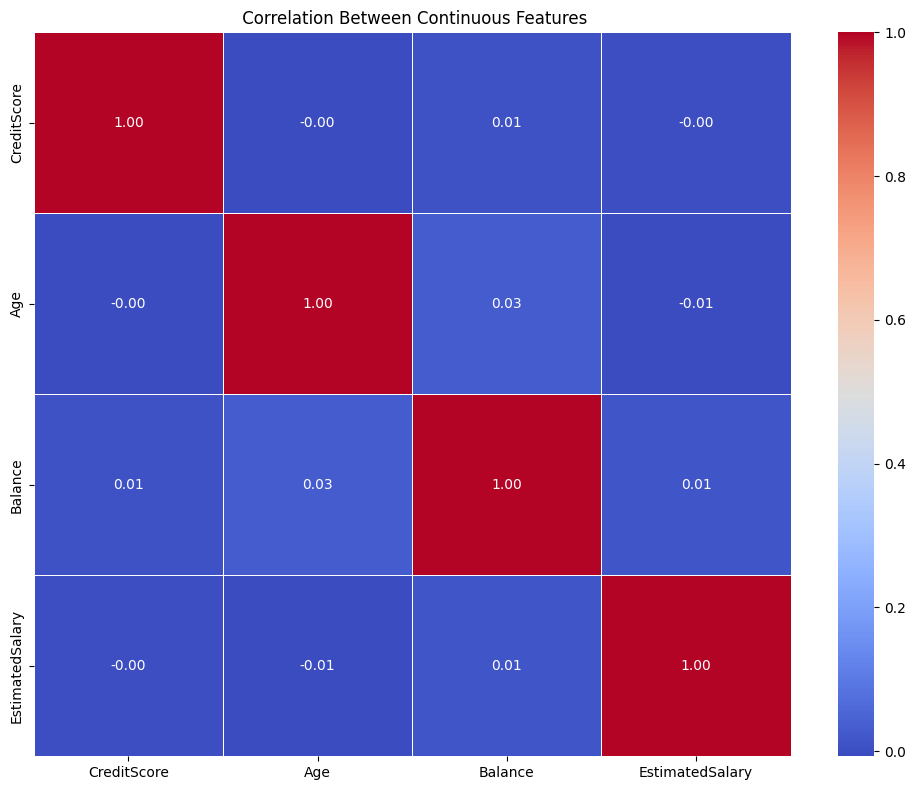

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title(' Correlation Between Continuous Features')
plt.tight_layout()
plt.show()

In [18]:
#split
X = df.drop('Exited', axis=1)
y = df['Exited']



🔎 Outliers in 'CreditScore': 15 rows


C:\Users\DELL\AppData\Local\Temp\ipykernel_19492\2705836656.py:18: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from current font.
  plt.tight_layout()
C:\Users\DELL\anaconda3\envs\tf\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


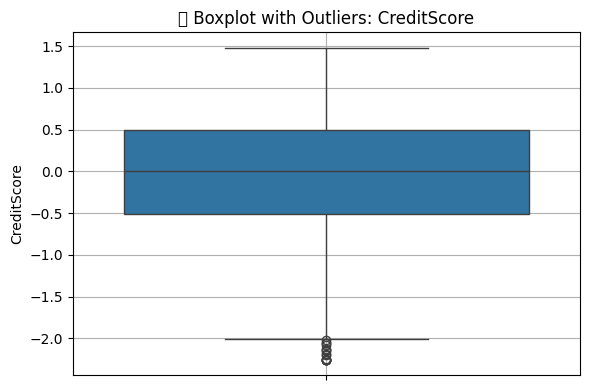


🔎 Outliers in 'Age': 359 rows


C:\Users\DELL\AppData\Local\Temp\ipykernel_19492\2705836656.py:18: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from current font.
  plt.tight_layout()
C:\Users\DELL\anaconda3\envs\tf\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


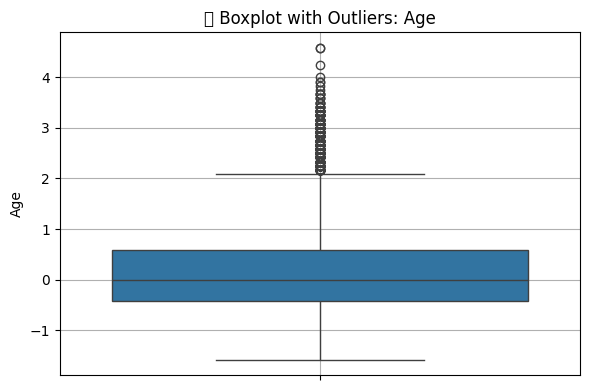


🔎 Outliers in 'Balance': 0 rows


C:\Users\DELL\AppData\Local\Temp\ipykernel_19492\2705836656.py:18: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from current font.
  plt.tight_layout()
C:\Users\DELL\anaconda3\envs\tf\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


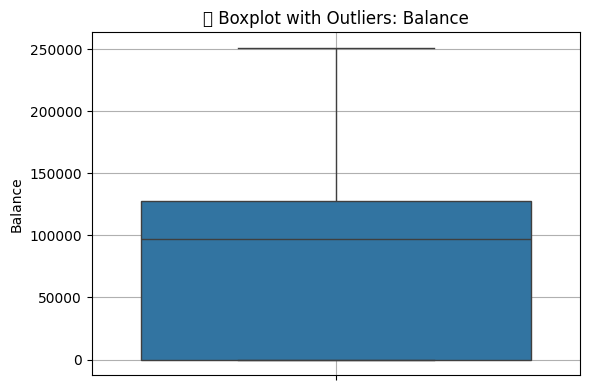


🔎 Outliers in 'EstimatedSalary': 0 rows


C:\Users\DELL\AppData\Local\Temp\ipykernel_19492\2705836656.py:18: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from current font.
  plt.tight_layout()
C:\Users\DELL\anaconda3\envs\tf\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


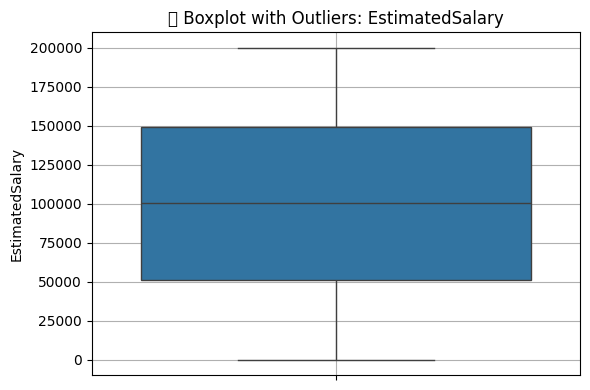

In [19]:
for col in continuous_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Boolean Indexing للقيم الشاذة
    outliers = df[(df[col] < lower) | (df[col] > upper)]

    print(f"\n🔎 Outliers in '{col}': {len(outliers)} rows")

    # رسم Boxplot مع توضيح القيم الشاذة
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[col])
    plt.title(f'📦 Boxplot with Outliers: {col}')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    

In [20]:
label_counts = df['Exited'].value_counts()

print("Label Distribution:")
print(label_counts)



Label Distribution:
Exited
0    7963
1    2037
Name: count, dtype: int64


In [21]:
!pip install imblearn

In [29]:
from imblearn.over_sampling import SMOTE
import pandas as pd

smote = SMOTE(random_state=42)

X, y = smote.fit_resample(X, y)

print("Label Distribution after SMOTE:")
print(pd.Series(y).value_counts())


Label Distribution after SMOTE:
Exited
1    7963
0    7963
Name: count, dtype: int64


In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[continuous_cols] = scaler.fit_transform(df[continuous_cols])

print(df[continuous_cols].head())

   CreditScore       Age   Balance  EstimatedSalary
0        0.538  0.324324  0.000000         0.506735
1        0.516  0.310811  0.334031         0.562709
2        0.304  0.324324  0.636357         0.569654
3        0.698  0.283784  0.000000         0.469120
4        1.000  0.337838  0.500246         0.395400


In [31]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

continuous_cols = [col for col in df.select_dtypes(include=['int64', 'float64']).columns if df[col].nunique() >= 20]
df_before = df[continuous_cols].copy()
scaler = StandardScaler()

df[continuous_cols] = scaler.fit_transform(df[continuous_cols])

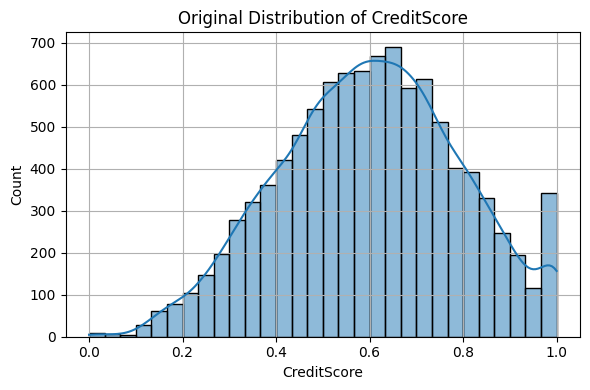

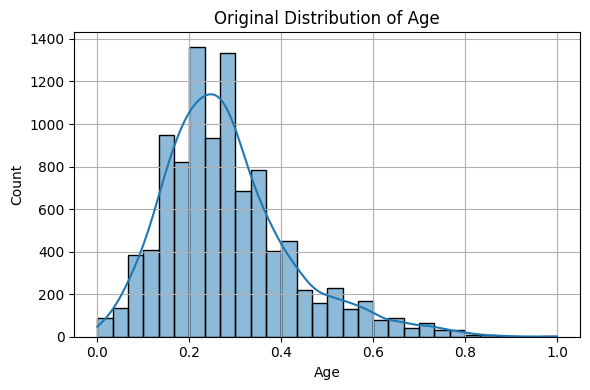

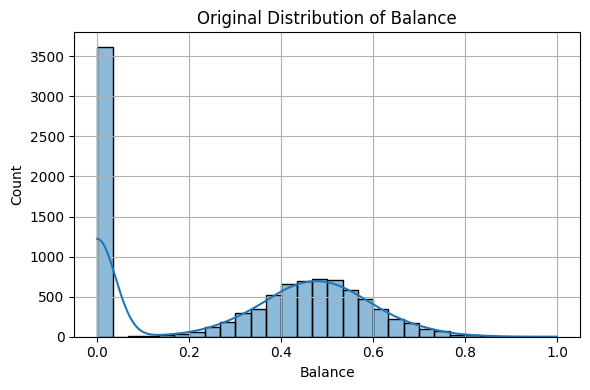

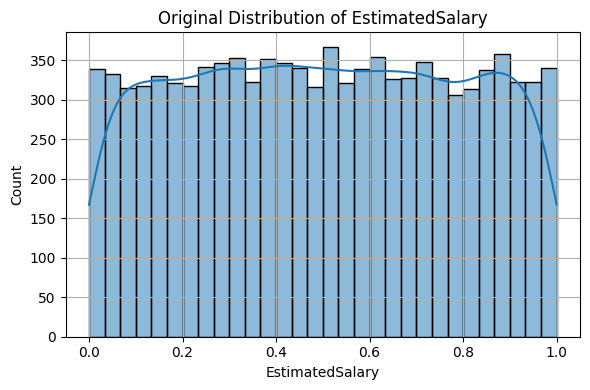

In [32]:
for col in continuous_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_before[col], kde=True, bins=30)
    plt.title(f'Original Distribution of {col}')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

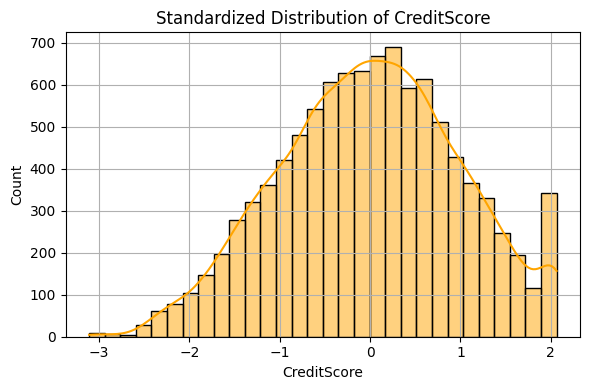

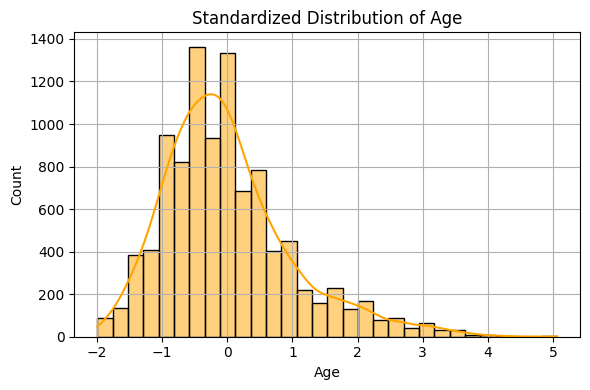

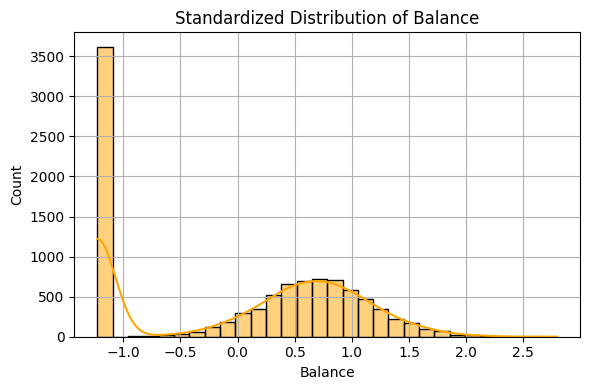

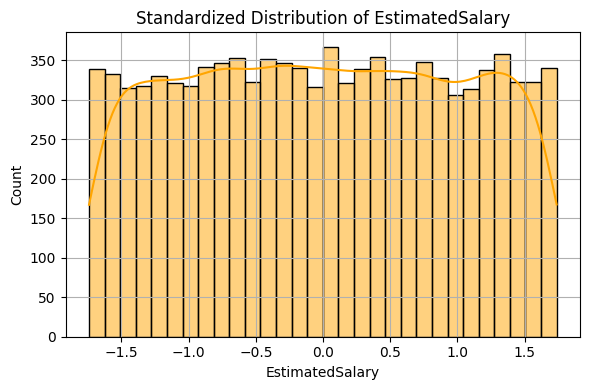

In [33]:
for col in continuous_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30, color='orange')
    plt.title(f'Standardized Distribution of {col}')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


logistic Regression

In [35]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Confusion Matrix:
[[ 717  916]
 [ 457 1096]]

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.44      0.51      1633
           1       0.54      0.71      0.61      1553

    accuracy                           0.57      3186
   macro avg       0.58      0.57      0.56      3186
weighted avg       0.58      0.57      0.56      3186

Accuracy: 0.5690521029504081


In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

knn_model = KNeighborsClassifier(n_neighbors=1)

knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

# 4. تقييم النموذج
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Confusion Matrix:
[[1060  573]
 [ 395 1158]]

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.65      0.69      1633
           1       0.67      0.75      0.71      1553

    accuracy                           0.70      3186
   macro avg       0.70      0.70      0.70      3186
weighted avg       0.70      0.70      0.70      3186

Accuracy: 0.6961707470182047


In [42]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

score_list = []

print("Cross-Validation Accuracy Scores for Different k:")
for k in range(1, 50, 2):
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    
    scores = cross_val_score(knn_clf, X_train, y_train, cv=10, scoring='accuracy')
    
    mean_score = scores.mean().round(4)
    score_list.append(mean_score)
    
    print(f"k = {k:<2}     Accuracy = {mean_score}")


Cross-Validation Accuracy Scores for Different k:
k = 1      Accuracy = 0.6862
k = 3      Accuracy = 0.6823
k = 5      Accuracy = 0.6714
k = 7      Accuracy = 0.6651
k = 9      Accuracy = 0.6657
k = 11     Accuracy = 0.6553
k = 13     Accuracy = 0.6482
k = 15     Accuracy = 0.6429
k = 17     Accuracy = 0.6369
k = 19     Accuracy = 0.633
k = 21     Accuracy = 0.6297
k = 23     Accuracy = 0.6275
k = 25     Accuracy = 0.6222
k = 27     Accuracy = 0.6157
k = 29     Accuracy = 0.6143
k = 31     Accuracy = 0.615
k = 33     Accuracy = 0.6119
k = 35     Accuracy = 0.6067
k = 37     Accuracy = 0.6001
k = 39     Accuracy = 0.5991
k = 41     Accuracy = 0.5925
k = 43     Accuracy = 0.5909
k = 45     Accuracy = 0.5866
k = 47     Accuracy = 0.5838
k = 49     Accuracy = 0.5835


In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

dt_model = DecisionTreeClassifier(random_state=42)

dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Confusion Matrix:
[[1324  309]
 [ 259 1294]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.81      0.82      1633
           1       0.81      0.83      0.82      1553

    accuracy                           0.82      3186
   macro avg       0.82      0.82      0.82      3186
weighted avg       0.82      0.82      0.82      3186

Accuracy: 0.8217200251098556


In [46]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# 1. إنشاء النموذج
svc_model = SVC(kernel='rbf', C=.5, random_state=42)

# 2. تدريب النموذج
svc_model.fit(X_train, y_train)

# 3. التنبؤ
y_pred = svc_model.predict(X_test)

# 4. تقييم النموذج
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Confusion Matrix:
[[ 642  991]
 [ 389 1164]]

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.39      0.48      1633
           1       0.54      0.75      0.63      1553

    accuracy                           0.57      3186
   macro avg       0.58      0.57      0.55      3186
weighted avg       0.58      0.57      0.55      3186

Accuracy: 0.5668549905838042


In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# 1. إنشاء النموذج
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# 2. تدريب النموذج
rf_model.fit(X_train, y_train)

# 3. التنبؤ
y_pred = rf_model.predict(X_test)

# 4. تقييم النموذج
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Confusion Matrix:
[[1419  214]
 [ 225 1328]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.87      0.87      1633
           1       0.86      0.86      0.86      1553

    accuracy                           0.86      3186
   macro avg       0.86      0.86      0.86      3186
weighted avg       0.86      0.86      0.86      3186

Accuracy: 0.8622096672944131


In [49]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [50]:
base_learners = [
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('svc', SVC(kernel='rbf', probability=True, random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
]

# 2. تعريف الميتا موديل (Meta Learner)
meta_model = LogisticRegression()

stack_model = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_model,
    cv=5
)

# 4. تدريب النموذج
stack_model.fit(X_train, y_train)

# 5. التنبؤ
y_pred = stack_model.predict(X_test)

# 6. تقييم النموذج
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Confusion Matrix:
[[1443  190]
 [ 210 1343]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.88      0.88      1633
           1       0.88      0.86      0.87      1553

    accuracy                           0.87      3186
   macro avg       0.87      0.87      0.87      3186
weighted avg       0.87      0.87      0.87      3186

Accuracy: 0.874450721908349
